<a href="https://colab.research.google.com/github/jacob-siby/yT_st_analysis/blob/main/aiProj_sentAnly_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 1.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
os.chdir("/content/drive/My Drive/ML_Project/")

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy


import warnings
warnings.filterwarnings("ignore")

In [7]:
from textblob import TextBlob
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [8]:
ls

english_comments.csv  ML_project_data.xlsx
ML_project_data.csv   ML_Project_Details.docx


In [10]:
data = pd.read_csv("english_comments.csv")

In [11]:
data.head()

,Comments,clean_comments,language
0,"Premiere Pro, DaVinci Resolve 17, FCPX and XCo...","Premiere Pro, DaVinci Resolve 17, FCPX and XCo...",en
1,"When Galaxy Tab finally caught up, Apple made ...","When Galaxy Tab finally caught up, Apple made ...",en
2,You can play Dota and CSGO?,You can play Dota and CSGO?,en
3,"Fire ? intro! I think You’re right, iPad OS 15...","Fire ? intro! I think You’re right, iPad OS 15...",en
4,still waiting for comments from professionals ...,still waiting for comments from professionals ...,en


In [12]:
data.shape

(17098, 3)

In [23]:
data['polarity'] = data['clean_comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [24]:
data.head()

,Comments,clean_comments,language,polarity,pol_cat
0,Will there be any midrange compact phone in fu...,Will there be any midrange compact phone in fu...,en,0.0000,-1
1,It's pathetically embarrassing that they're ST...,It's pathetically embarrassing that they're ST...,en,-0.0500,-1
2,I need that music,I need that music,en,0.0000,-1
3,"Well, there's Blood & Truth and the upcoming F...","Well, there's Blood & Truth and the upcoming F...",en,0.0000,-1
4,I just built an itx build in an original Xbox ...,I just built an itx build in an original Xbox ...,en,0.6875,1


Shuffle the dataset

In [25]:
data = data.sample(frac=1).reset_index(drop=True)

In [26]:
data['pol_cat']  = 0

In [27]:
data['pol_cat'][data.polarity > 0] = 1
data['pol_cat'][data.polarity <= 0] = -1

In [28]:
data.head()

,Comments,clean_comments,language,polarity,pol_cat
0,In my shop the 16Go As double the price of the...,In my shop the 16Go As double the price of the...,en,0.000000,-1
1,waiting 8vs 16 vs intel gen10 with plug /unplug,waiting 8vs 16 vs intel gen10 with plug /unplug,en,0.000000,-1
2,So there’s a few problems here with your Logic...,So there’s a few problems here with your Logic...,en,0.034226,1
3,0:24 she is Hu Tao isn't she,0:24 she is Hu Tao isn't she,en,0.000000,-1
4,Next you should have the table nailed to the c...,Next you should have the table nailed to the c...,en,0.175000,1


Comment polarity

In [29]:
data['pol_cat'].value_counts()

-1    8777
 1    8321
Name: pol_cat, dtype: int64

In [30]:
data_pos = data[data['pol_cat'] == 1]
data_pos = data_pos.reset_index(drop = True)

data_neg = data[data['pol_cat'] == -1]
data_neg = data_neg.reset_index(drop = True)

In [31]:
data_pos.head()

,Comments,clean_comments,language,polarity,pol_cat
0,So there’s a few problems here with your Logic...,So there’s a few problems here with your Logic...,en,0.034226,1
1,Next you should have the table nailed to the c...,Next you should have the table nailed to the c...,en,0.175000,1
2,"Basically, Xbox has a massive massive win for ...","Basically, Xbox has a massive massive win for ...",en,0.266667,1
3,"definitely it will, but you shouldn't fill up ...","definitely it will, but you shouldn't fill up ...",en,0.133333,1
4,I seriously wanted to buy a Mac Mini ... but w...,I seriously wanted to buy a Mac Mini ... but w...,en,0.062509,1


In [32]:
data_pos.shape

(8321, 5)

In [33]:
data_neg.head()

,Comments,clean_comments,language,polarity,pol_cat
0,In my shop the 16Go As double the price of the...,In my shop the 16Go As double the price of the...,en,0.0,-1
1,waiting 8vs 16 vs intel gen10 with plug /unplug,waiting 8vs 16 vs intel gen10 with plug /unplug,en,0.0,-1
2,0:24 she is Hu Tao isn't she,0:24 she is Hu Tao isn't she,en,0.0,-1
3,@Matt Which will then lead to AMD being the vi...,@Matt Which will then lead to AMD being the vi...,en,0.0,-1
4,you test ram but dont include a Chrome test......,you test ram but dont include a Chrome test......,en,0.0,-1


In [40]:
data_pos['clean_comments'][1]

"Next you should have the table nailed to the ceiling with the computers dangling from it and you standing underneath reviewing them. That's gonna end up being the sweet spot."

-1    8777
 1    8321
Name: pol_cat, dtype: int64

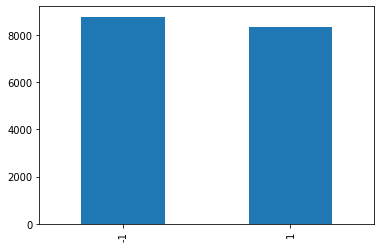

In [41]:
data.pol_cat.value_counts().plot.bar()
data.pol_cat.value_counts()

**Data Preprocessing**
Lower the text in comments

In [62]:
data['clean_comments'] = data['clean_comments'].str.lower()

In [63]:
data['clean_comments'].head()

0    in my shop the 16go as double the price of the...
1      waiting 8vs 16 vs intel gen10 with plug /unplug
2    so there’s a few problems here with your logic...
3                         0:24 she is hu tao isn't she
4    next you should have the table nailed to the c...
Name: clean_comments, dtype: object

In [45]:
data.describe()

,polarity,pol_cat
count,17098.000000,17098.000000
mean,0.129998,-0.026670
std,0.300464,0.999674
min,-1.000000,-1.000000
25%,0.000000,-1.000000
50%,0.000000,-1.000000
75%,0.283333,1.000000
max,1.000000,1.000000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17098 entries, 0 to 17097
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Comments        17098 non-null  object 
 1   clean_comments  17098 non-null  object 
 2   language        17098 non-null  object 
 3   polarity        17098 non-null  float64
 4   pol_cat         17098 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 668.0+ KB


In [64]:
data['clean_comments'][0]

'in my shop the 16go as double the price of the 8go...'

In [65]:
data['clean_comments'][0].strip()

'in my shop the 16go as double the price of the 8go...'

In [66]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
import nltk

In [69]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [70]:
stop_words = set(stopwords.words('english'))

In [71]:
data['clean_comments'] = data['clean_comments'].str.strip()

In [72]:
train = data.copy()

In [73]:
train['clean_comments'] = train['clean_comments'].str.strip()

In [76]:

train['clean_comments'][0]

'in my shop the 16go as double the price of the 8go...'

In [77]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [78]:
data['stop_comments'] = data['clean_comments'].apply(lambda x : remove_stopwords(x))

In [79]:
data.head()

,Comments,clean_comments,language,polarity,pol_cat,comments,stop_comments
0,in my shop the 16go as double the price of the...,in my shop the 16go as double the price of the...,en,0.000000,-1,in my shop the 16go as double the price of the...,shop 16go double price 8go ...
1,waiting 8vs 16 vs intel gen10 with plug /unplug,waiting 8vs 16 vs intel gen10 with plug /unplug,en,0.000000,-1,waiting 8vs 16 vs intel gen10 with plug /unplug,waiting 8vs 16 vs intel gen10 plug /unplug
2,so there’s a few problems here with your logic...,so there’s a few problems here with your logic...,en,0.034226,1,so there’s a few problems here with your logic...,’ problems logic performance benchmark . first...
3,0:24 she is hu tao isn't she,0:24 she is hu tao isn't she,en,0.000000,-1,0:24 she is hu tao isn't she,0:24 hu tao n't
4,next you should have the table nailed to the c...,next you should have the table nailed to the c...,en,0.175000,1,next you should have the table nailed to the c...,next table nailed ceiling computers dangling s...


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [82]:
X_train.shape

(13678,)

In [83]:
X_test.shape

(3420,)

In [84]:
data['pol_cat'].value_counts()

-1    8777
 1    8321
Name: pol_cat, dtype: int64

**Logistic Regression**

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [91]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [92]:
tf_train.shape

(13678, 14786)

In [106]:
print(vect.vocabulary_)

{'matrix': 8223, 'need': 8882, 'smartass': 12052, 'rise': 11111, 'tomb': 13305, 'raider': 10522, 'two': 13573, 'words': 14462, 'halo': 6198, 'infinite': 6897, '39': 467, 'like': 7760, 'hair': 6188, 'lens': 7683, 'lol': 7877, 'desk': 3999, 'tripped': 13481, '35': 441, 'quick': 10472, 'resume': 10979, 'uummm': 13868, 'function': 5656, 'ps5': 10336, 'called': 2533, 'switcher': 12806, 'switch': 12804, 'quickly': 10475, 'games': 5734, 'payton': 9660, 'ok': 9232, 'try': 13515, 'sign': 11868, 'vr': 14077, 'using': 13851, 'facebook': 5079, 'account': 930, 'find': 5315, 'ur': 13825, 'real': 10622, 'age': 1102, 'trouble': 13491, 'starts': 12427, 'could': 3429, 'please': 9913, 'help': 6375, 'decide': 3837, 'buy': 2493, 'smartphone': 12056, 'samsung': 11358, 's20': 11293, 'fe': 5211, '5g': 615, 'vs': 14088, 'asus': 1618, 'rog': 11162, 'phone': 9775, '50k': 572, 'playing': 9898, 'important': 6789, 'thing': 13127, 'best': 2009, 'network': 8926, 'range': 10551, 'reception': 10666, 'good': 5979, '4g':

In [107]:
vocab = vect.vocabulary_

In [97]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tf_train,y_train)

LogisticRegression()

accuracy

In [98]:
lr.score(tf_train,y_train)

0.9578154700979675

In [99]:
lr.score(tf_test,y_test)

0.8918128654970761

making prediction

In [100]:
expected = y_test
predicted = lr.predict(tf_test)

ploting confusion matrix

In [101]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [102]:
pip install mlxtend

[[1371  262]
 [ 108 1679]]


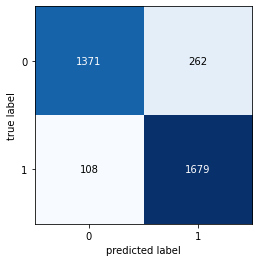

In [103]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,-1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [104]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

          -1       0.87      0.94      0.90      1787
           1       0.93      0.84      0.88      1633

    accuracy                           0.89      3420
   macro avg       0.90      0.89      0.89      3420
weighted avg       0.89      0.89      0.89      3420



In [105]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.8909282357094783